## ALGEBRA LINEAL 17

In [9]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def f(z):
    return z**3 - 1

def get_sympy_jacobian(F, x, y):
    J = [[0, 0], [0, 0]]
    for i in range(len(F)):
        J[i][0] = sym.diff(F[i], x)
        J[i][1] = sym.diff(F[i], y)
    return J

x, y = sym.symbols('x y', real=True)
z = x + sym.I*y
F = [sym.re(f(z)), sym.im(f(z))]
J = get_sympy_jacobian(F, x, y)
J

[[3*x**2 - 3*y**2, -6*x*y], [6*x*y, 3*x**2 - 3*y**2]]

Ahora implementamos el medtodo de Newton

In [10]:
SJ = sym.Matrix(J)
Fn = sym.lambdify([x, y], F, 'numpy')
SJn = sym.lambdify([x, y], SJ, 'numpy')

def Raices(Fn, SJn, z):
    h=1e-7
    error = np.inf
    Fnz = Fn(z[0], z[1])
    
    while not np.allclose(Fnz, h, atol=h):
        SJnz = SJn(z[0], z[1])
        IJn = np.linalg.inv(SJnz)
        
        z = z - np.dot(IJn, Fnz)
        Fnz = Fn(z[0], z[1])
    
    return z
z = [0.5, 0.5]
print(Raices(Fn, SJn, z))

[-0.5        0.8660254]


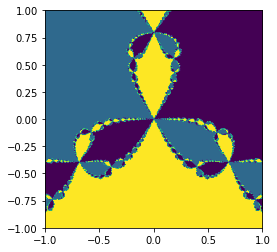

In [11]:
N = 300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
Fractal = np.zeros((N, N), np.int64)
error = 1e-7

for i in range(len(x)):
    for j in range(len(y)):
        if x[i] == 0 and y[j] == 0:
            continue
        
        res = Raices(Fn, SJn, [x[i], y[j]])

        if abs(res[0] - (-1/2)) < error and abs(res[1] - (np.sqrt(3)/2)) < error:
            Fractal[i][j] = 20
        elif abs(res[0] - (-1/2)) < error and abs(res[1] - (-np.sqrt(3)/2)) < error:
            Fractal[i][j] = 100
        elif abs(res[0] - 1) < error and abs(res[1] - 0) < error:
            Fractal[i][j] = 255

plt.imshow(Fractal, cmap='viridis', extent=[-1, 1, -1, 1])
